####Instructions
This IPython Notebook tests all of the common use cases for the IDL IPython Notebook. When the notebook loads, choose Cell->Run All. Scroll down through all of the tests and verify that the output matches the comments in each cell.

#IDL Interpreter

In [ ]:
; This should print out the numbers 0...9
foreach x,[0:9] do print,x*10

In [ ]:
; Implied print
2+2

# Markdown
This expression $\sqrt{3x-1}+(1+x)^2$ is an example of a TeX inline equation in a **[Markdown-formatted](http://daringfireball.net/projects/markdown/)** sentence.

**Maxwell's Equations**
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{align}

#Raw HTML

In [ ]:
; Any IDL output that starts with <HTML> should be sent to the notebook as raw HTML.
; This test should display words in bold and italic, and also have a hyperlink.
s1 = '<html>Here is some <B>BOLD</B> and <i>italic</i> HTML.<br>'
s2 = 'Go to the <a href="http://www.exelisvis.com/docs/using_idl_home.html" target="_blank">IDL Documentation Center</a>.'
print, s1 + s2


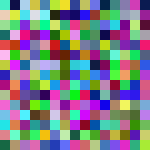

In [12]:
; This test should display a multicolor blocky image.
lam = Lambda(n,m:Reform(Congrid(255*Randomu(seed,n,n),n*m,n*m),1,n*m,n*m))
WRITE_PNG, '', [lam(15,10),lam(15,10),lam(15,10)], BUFFER=b
img = IDL_BASE64(b)
print,'<html><img src="data:image/png;base64,'+img+'"/></html>'

In [ ]:
; This test should display a PDF file embedded in the browser.
'<html><iframe src="http://paos.colorado.edu/research/wavelets/bams_79_01_0061.pdf" width="200" height="240" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen="true"></iframe

#Direct Graphics

In [ ]:
; this should generate a graphic with the rose image in the lower left
file = FILEPATH('rose.jpg', SUBDIRECTORY = ['examples', 'data'])
READ_JPEG, file, img
WINDOW, 0, XSIZE=350, YSIZE=300
TV, img, /TRUE

In [ ]:
; this should generate a graphic with 2 rose images offset from each other
TV, img, 100, 100, /TRUE

In [ ]:
; this should generate 2 plot windows labelled Plot 1 and Plot 2
window,0,xsize=400,ysize=300 & plot,[0,1],title='Plot 1'
window,1,xsize=400,ysize=300 & plot,[0,2],title='Plot 2'

In [ ]:
; This should overplot Plot 2 with a bunch of numbers
for i=0,10 do xyouts,i/10.,i/5.,i.tostring()

In [ ]:
; This should generate a surface plot with the rose image on top
surface, dist(100)
tv, img, /true

In [ ]:
; This should switch back to Plot 1 and overplot the rose image
wset, 0
tv, img, /true

#Function Graphics

In [ ]:
; This should generate 2 graphics plots labelled Plot 1 and Plot 2
p1 = plot(/test,'r', title='Plot 1', dim=[400,300])
p2 = plot(/test,'g', title='Plot 2', dim=[400,300])

In [ ]:
; This should redraw Plot 1 & 2 with thick lines
p1.thick = 5
p2.thick = 5

In [ ]:
; This should draw a surface in a floating function graphics window
; and an image embedded in the browser
; You should not see the plot at all.
!magic.embed = 0
s = surface(dist(100))
p = plot(/test,/buffer)
!magic.embed = 1
i = image(/test)

#Object Graphics

In [ ]:
; This should draw a temperature map of the world, in yellow/orange colors
; This test uses 24-bit RGB colors
worldtmpFile = FILEPATH('worldtmp.png', SUBDIRECTORY = ['examples', 'demo', 'demodata'])
worldtmpImage = READ_PNG(worldtmpFile)
dim = SIZE(worldtmpImage, /DIMENSIONS)
oWin = OBJ_NEW('IDLgrBuffer', DIMENSIONS = [dim[0], dim[1]])
oView = OBJ_NEW('IDLgrView', VIEWPLANE_RECT = [0, 0, dim[0], dim[1]])
oModel = OBJ_NEW('IDLgrModel')
oPalette = OBJ_NEW('IDLgrPalette')
oPalette -> LoadCT, 38
oImage = OBJ_NEW('IDLgrImage', worldtmpImage, PALETTE = oPalette)
oModel -> Add, oImage
oView -> Add, oModel
oWin -> Draw, oView

In [ ]:
; This should draw a temperature map of the world, in yellow/orange colors
; This test uses indexed 8-bit colors
worldtmpFile = FILEPATH('worldtmp.png', SUBDIRECTORY = ['examples', 'demo', 'demodata'])
worldtmpImage = READ_PNG(worldtmpFile)
dim = SIZE(worldtmpImage, /DIMENSIONS)
oPalette = OBJ_NEW('IDLgrPalette')
oPalette -> LoadCT, 38
oWin = OBJ_NEW('IDLgrBuffer', DIMENSIONS = [dim[0], dim[1]], COLOR_MODEL=1, PALETTE = oPalette)
oView = OBJ_NEW('IDLgrView', VIEWPLANE_RECT = [0, 0, dim[0], dim[1]])
oModel = OBJ_NEW('IDLgrModel')
oImage = OBJ_NEW('IDLgrImage', worldtmpImage)
oModel -> Add, oImage
oView -> Add, oModel
oWin -> Draw, oView